<a href="https://colab.research.google.com/github/FaragoFa/PDI-ML/blob/main/Demo_PDI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ⚡ Before you start

**NOTE:** In this notebook, we aim to show - among other things - how simple it is to integrate `supervision` with popular object detection and instance segmentation libraries and frameworks. GPU access is optional but will certainly make the ride smoother.

<br>

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Nov 13 14:48:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**NOTE:** During our demo, we will need some example images.

In [ ]:
!mkdir {HOME}/images

**NOTE:** Feel free to use your images. Just make sure to put them into `images` directory that we just created. ☝️

In [ ]:
%cd {HOME}/images

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-5.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-6.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-7.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-8.jpeg

/content/images


## ‍💻 Install

In [ ]:
!pip install -q supervision

import supervision as sv
print(sv.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 1.7 MB/s eta 0:00:00
0.16.0


## 👁️ Detection API

- xyxy `(np.ndarray)`: An array of shape `(n, 4)` containing the bounding boxes coordinates in format `[x1, y1, x2, y2]`
- mask: `(Optional[np.ndarray])`: An array of shape `(n, W, H)` containing the segmentation masks.
- confidence `(Optional[np.ndarray])`: An array of shape `(n,)` containing the confidence scores of the detections.
- class_id `(Optional[np.ndarray])`: An array of shape `(n,)` containing the class ids of the detections.
- tracker_id `(Optional[np.ndarray])`: An array of shape `(n,)` containing the tracker ids of the detections.

### 🔌 Plug in your model

**NOTE:** In our example, we will focus only on integration with YOLO-NAS and YOLOv8. However, keep in mind that supervision allows seamless integration with many other models like SAM, Transformers, and YOLOv5. You can learn more from our [documentation](https://roboflow.github.io/supervision/detection/core/#detections).

In [ ]:
import cv2

IMAGE_PATH = f"{HOME}/images/dog.jpeg"

image = cv2.imread(IMAGE_PATH)

### YOLO-NAS [📚](https://roboflow.github.io/supervision/detection/core/#supervision.detection.core.Detections.from_yolo_nas)

In [ ]:
!pip install -q super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to b

In [ ]:
from super_gradients.training import models

model = models.get('yolo_nas_l', pretrained_weights="coco")
result = model.predict(image)[0]
detections = sv.Detections.from_yolo_nas(result)

The console stream is logged into /root/sg_logs/console.log


[2023-11-13 14:49:54] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-13 14:49:55] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-13 14:49:55] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-11-13 14:50:04] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-13 14:50:04] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-13 14:50:04] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-13 14:50:04] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-11-13 14:50:04] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-11-13 14:50:04] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-11-13 14:50:04] WARNING - env_sanity_check.py - 

In [ ]:
"detections", len(detections)

('detections', 7)

### Ultralytics [📚](https://roboflow.github.io/supervision/detection/core/#supervision.detection.core.Detections.from_ultralytics)

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')
result = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)

100%|██████████| 21.5M/21.5M [00:00<00:00, 191MB/s]


In [ ]:
"detections", len(detections)

('detections', 4)

### 👩‍🎨 Annotate

### BoxAnnotator [📚](https://roboflow.github.io/supervision/detection/annotate/#boxannotator)

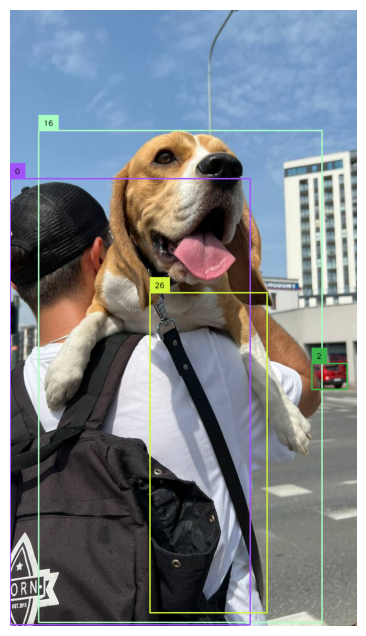

In [ ]:
box_annotator = sv.BoxAnnotator()

annotated_image = box_annotator.annotate(image.copy(), detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

**NOTE:** By default `sv.BoxAnnotator` use corresponding `class_id` as label, however, the labels can have arbitrary format.

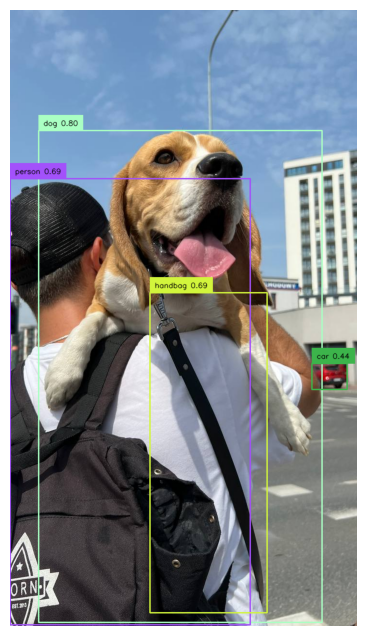

In [ ]:
box_annotator = sv.BoxAnnotator()

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]
annotated_image = box_annotator.annotate(image.copy(), detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(8, 8))

### MaskAnnotator [📚](https://roboflow.github.io/supervision/detection/annotate/#maskannotator)

In [ ]:
mask_annotator = sv.MaskAnnotator(color_map="index")

annotated_image = mask_annotator.annotate(image.copy(), detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

TypeError: ignored

## 🗑 Filter [📚](https://roboflow.github.io/supervision/quickstart/detections/)

### By index, index list and index slice

**NOTE:** `sv.Detections` filter API allows you to access detections by index, index list or index slice

In [ ]:
detections_index = detections[0]
detections_index_list = detections[[0, 1, 3]]
detections_index_slice = detections[:2]

In [ ]:
box_annotator = sv.BoxAnnotator()

images = [
    box_annotator.annotate(image.copy(), detections=d)
    for d
    in [detections_index, detections_index_list, detections_index_slice]
]
titles = [
    "by index - detections[0]",
    "by index list - detections[[0, 1, 3]]",
    "by index slice - detections[:2]"
]

sv.plot_images_grid(images=images, titles=titles, grid_size=(1, 3))

### By class_id

**NOTE:** Let's use `sv.Detections` filter API to display only objects with `class_id == 0`

In [ ]:
detections_filtered = detections[detections.class_id == 0]

In [ ]:
box_annotator = sv.BoxAnnotator()
annotated_image = box_annotator.annotate(image.copy(), detections=detections_filtered)
sv.plot_image(image=annotated_image, size=(8, 8))

### By confidence

**NOTE:** Let's use `sv.Detections` filter API to display only objects with `confidence > 0.75`

In [ ]:
detections_filtered = detections[detections.confidence > 0.75]

In [ ]:
box_annotator = sv.BoxAnnotator()
labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections_filtered.class_id, detections_filtered.confidence)
]
annotated_image = box_annotator.annotate(image.copy(), detections=detections_filtered, labels=labels)
sv.plot_image(image=annotated_image, size=(8, 8))

### By advanced logical condition

**NOTE:** Let's use `sv.Detections` filter API allows you to build advanced logical conditions. Let's select only detections with `class_id != 0` and `confidence > 0.75`.

In [ ]:
detections_filtered = detections[(detections.class_id != 0) & (detections.confidence > 0.75)]

In [ ]:
box_annotator = sv.BoxAnnotator()
labels = [
    f"{class_id} {confidence:.2f}"
    for class_id, confidence
    in zip(detections_filtered.class_id, detections_filtered.confidence)
]
annotated_image = box_annotator.annotate(image.copy(), detections=detections_filtered, labels=labels)
sv.plot_image(image=annotated_image, size=(8, 8))

## 🎬 Video API

**NOTE:** `supervision` offers a lot of utils to make working with videos easier. Let's take a look at some of them.

**NOTE:** During our demo, we will need some example videos.

In [ ]:
!mkdir {HOME}/videos

**NOTE:** Feel free to use your videos. Just make sure to put them into `videos` directory that we just created. ☝️

In [ ]:
%cd {HOME}/videos

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt

/content/videos
--2023-11-13 14:52:51--  https://docs.google.com/uc?export=download&confirm=&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-
Resolving docs.google.com (docs.google.com)... 142.251.2.102, 142.251.2.138, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/em5uhmqdeacsv3jr85htpoqbja6f88hf/1699887150000/04309230031174164349/*/1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-?e=download&uuid=6071be8e-14f1-4264-afcf-ffb545830236 [following]
--2023-11-13 14:52:52--  https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/em5uhmqdeacsv3jr85htpoqbja6f88hf/1699887150000/04309230031174164349/*/1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-?e=download&uuid=6071be8e-14f1-4264-afcf-ffb545830236
Resolving doc-0s-ag-docs.googleusercontent.com (doc-0s-ag-docs.googleusercontent.com)... 142.2

In [ ]:
VIDEO_PATH = f"{HOME}/videos/vehicle-counting.mp4"

### VideoInfo [📚](https://roboflow.github.io/supervision/utils/video/#videoinfo)

**NOTE:** `VideoInfo` allows us to easily retrieve information about video files, such as resolution, FPS and total number of frames.

In [ ]:
sv.VideoInfo.from_video_path(video_path=VIDEO_PATH)

VideoInfo(width=3840, height=2160, fps=25, total_frames=538)

### get_video_frames_generator [📚](https://roboflow.github.io/supervision/utils/video/#get_video_frames_generator)

In [ ]:
frame_generator = sv.get_video_frames_generator(source_path=VIDEO_PATH)

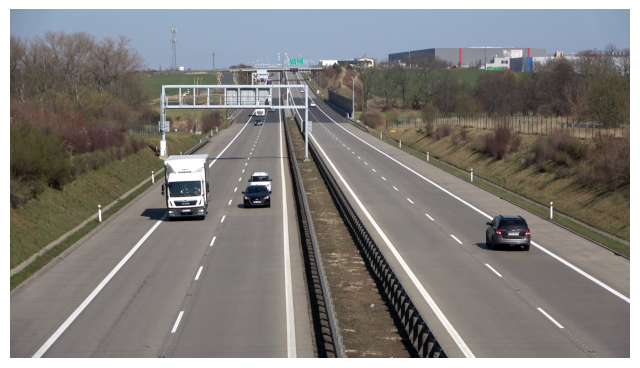

In [ ]:
frame = next(iter(frame_generator))
sv.plot_image(image=frame, size=(8, 8))

### VideoSink [📚](https://roboflow.github.io/supervision/utils/video/#videosink)

In [ ]:
RESULT_VIDEO_PATH = f"{HOME}/videos/vehicle-counting-result.mp4"

**NOTE:** Note that this time we have given a custom value for the `stride` parameter equal to `2`. As a result, `get_video_frames_generator` will return us every second video frame.

In [ ]:
video_info = sv.VideoInfo.from_video_path(video_path=VIDEO_PATH)

with sv.VideoSink(target_path=RESULT_VIDEO_PATH, video_info=video_info) as sink:
    for frame in sv.get_video_frames_generator(source_path=VIDEO_PATH, stride=2):
        sink.write_frame(frame=frame)

**NOTE:** If we once again use `VideoInfo` we will notice that the final video has 2 times fewer frames.

In [ ]:
sv.VideoInfo.from_video_path(video_path=RESULT_VIDEO_PATH)

VideoInfo(width=3840, height=2160, fps=25, total_frames=269)

## 🖼️ Dataset API

**NOTE:** In order to demonstrate the capabilities of the Dataset API, we need a dataset. Let's download one from [Roboflow Universe](https://universe.roboflow.com/). To do this we first need to install the `roboflow` pip package.

In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 3.4.1 requires pyparsing==2.4.5, but you have pyparsing 2.4.7 which is incompatible.
tensorflow 2.14.0 requires numpy>=1.23.5, but you have numpy 1.23.0 which is incompatible.


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("roboflow-jvuqo").project("fashion-assistant-segmentation")
dataset = project.version(5).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.208, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to fashion-assistant-segmentation-5 in yolov8::   0%|          | 0/1254 [00:00<?, ?it/s]

Extracting Dataset Version Zip to fashion-assistant-segmentation-5 in yolov8::  37%|███▋      | 459/1254 [00:00<00:00, 2047.24it/s]

### DetectionDataset.from_yolo [📚](https://roboflow.github.io/supervision/dataset/core/#supervision.dataset.core.DetectionDataset.from_yolo)

**NOTE:** Currently Dataset API always loads loads images from hard drive. In the future, we plan to add lazy loading.

In [ ]:
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/train/images",
    annotations_directory_path=f"{dataset.location}/train/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
)

In [ ]:
len(ds)

573

In [ ]:
ds.classes

['baseball cap',
 'hoodie',
 'jacket',
 'pants',
 'shirt',
 'shorts',
 'sneaker',
 'sunglasses',
 'sweatshirt',
 't-shirt']

### 🏷️ Visualize annotations

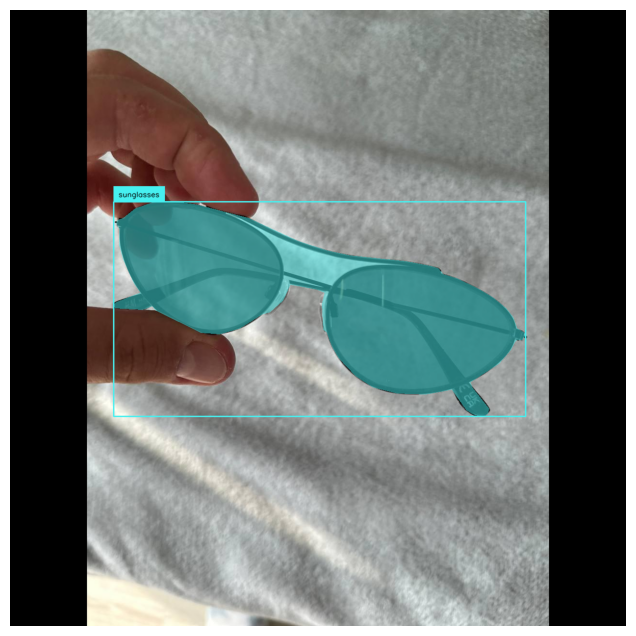

In [ ]:
IMAGE_NAME = list(ds.images.keys())[0]

image = ds.images[IMAGE_NAME]
annotations = ds.annotations[IMAGE_NAME]

box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

annotated_image = mask_annotator.annotate(image.copy(), detections=annotations)
annotated_image = box_annotator.annotate(annotated_image, detections=annotations, labels=labels)

sv.plot_image(image=annotated_image, size=(8, 8))

### split [📚](https://roboflow.github.io/supervision/dataset/core/#supervision.dataset.core.DetectionDataset.split)

In [ ]:
ds_train, ds_test = ds.split(split_ratio=0.8)

In [ ]:
"ds_train", len(ds_train), "ds_test", len(ds_test)

('ds_train', 458, 'ds_test', 115)

### DetectionDataset.as_pascal_voc [📚](https://roboflow.github.io/supervision/dataset/core/#supervision.dataset.core.DetectionDataset.as_pascal_voc)

In [ ]:
ds_train.as_pascal_voc(
    images_directory_path=f"{HOME}/datasets/result/images",
    annotations_directory_path=f"{HOME}/datasets/result/labels"
)

In [ ]:
import numpy as np

model = YOLO("yolov8n.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {results.names[class_id]}"
        for class_id, tracker_id
        in zip(detections.class_id, detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=detections)
    return label_annotator.annotate(
        annotated_frame, detections=detections, labels=labels)

sv.process_video(
    source_path="/content/videos/bici2.mp4",
    target_path="/content/videos/result2.mp4",
    callback=callback
)

100%|██████████| 6.23M/6.23M [00:00<00:00, 92.2MB/s]

0: 384x640 2 persons, 187.1ms
Speed: 1.5ms preprocess, 187.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 29.4ms
Speed: 1.3ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 1.3ms preprocess, 13.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.1ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 11.5ms
Speed: 1.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 52.0ms
Speed: 1.2ms preprocess, 52.0ms inference, 10.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.0ms
Speed: 1.4ms preprocess, 18.0ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 33.1ms
Speed: 1.4ms preprocess, 33.1ms i

## 🏆 Congratulations

### Learning Resources

- [Documentation](https://roboflow.github.io/supervision/)
- [GitHub](https://github.com/roboflow/supervision)
- [YouTube Supervision Playlist](https://www.youtube.com/playlist?list=PLZCA39VpuaZaoGIohe9aXVMm24MRvfu1E)